In [116]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pathlib
import os
import glob as gb
import cv2
import PIL
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping ,ReduceLROnPlateau 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Dense , Dropout , Flatten , MaxPooling2D , BatchNormalization ,experimental
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

In [3]:
pwd

'C:\\Users\\Admin'

# 1.

In [142]:
#data path
trainpath = 'C:\\Users\\Admin\\Desktop\\Skin_Cancer\\train' #Please give the path where you are saving the train folder.
testpath = 'C:\\Users\\Admin\\Desktop\\Skin_Cancer\\train' #please give the path where you are saving the test folder.

In [143]:
new_size=224
train_images=[]
train_labels=[]
for i in os.listdir(trainpath):#entering train folder
  print("Entering to the folder name:",i)
  files=gb.glob(pathname=str(trainpath+'/' + i + '/*.jpg'))# pointing to all the .jpg extension image folder
  print("Number of images in the folder is",len(files))
  for j in files:# reading each images
      class_cancer={'benign':0,'malignant':1}
      image_raw=cv2.imread(j)
      image=cv2.cvtColor(image_raw,cv2.COLOR_BGR2RGB)
      resize_image=cv2.resize(image,(new_size,new_size))
      train_images.append(list(resize_image))
      train_labels.append(class_cancer[i])
      

Entering to the folder name: benign
Number of images in the folder is 25
Entering to the folder name: malignant
Number of images in the folder is 25


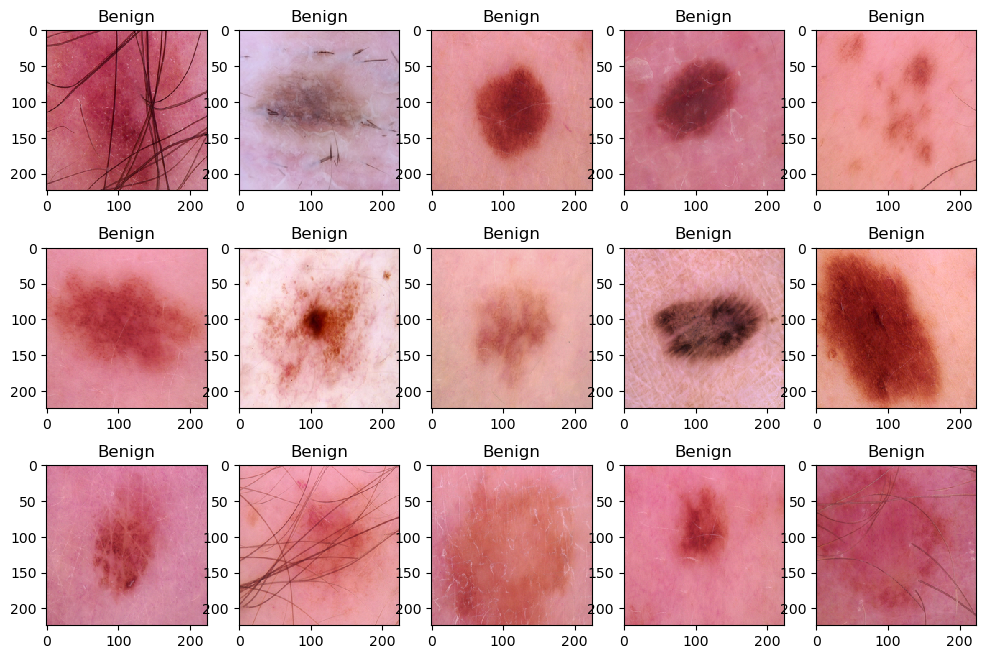

In [144]:
w=40
h=30
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if train_labels[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(train_images[i], interpolation='nearest')
plt.show()

In [145]:
new_size=224
test_images=[]
test_labels=[]
for i in os.listdir(testpath):# entering to the test folder
  print("Entering to the folder name:",i)
  files=gb.glob(pathname=str(testpath +'/' + i + '/*.jpg'))# pointing to all the .jpg extension image folder
  print("Number of images in the folder is",len(files))
  for j in files:
      class_cancer={'benign':0,'malignant':1}
      image_raw=cv2.imread(j)
      image=cv2.cvtColor(image_raw,cv2.COLOR_BGR2RGB)
      resize_image=cv2.resize(image,(new_size,new_size))
      test_images.append(list(resize_image))
      test_labels.append(class_cancer[i])

Entering to the folder name: benign
Number of images in the folder is 25
Entering to the folder name: malignant
Number of images in the folder is 25


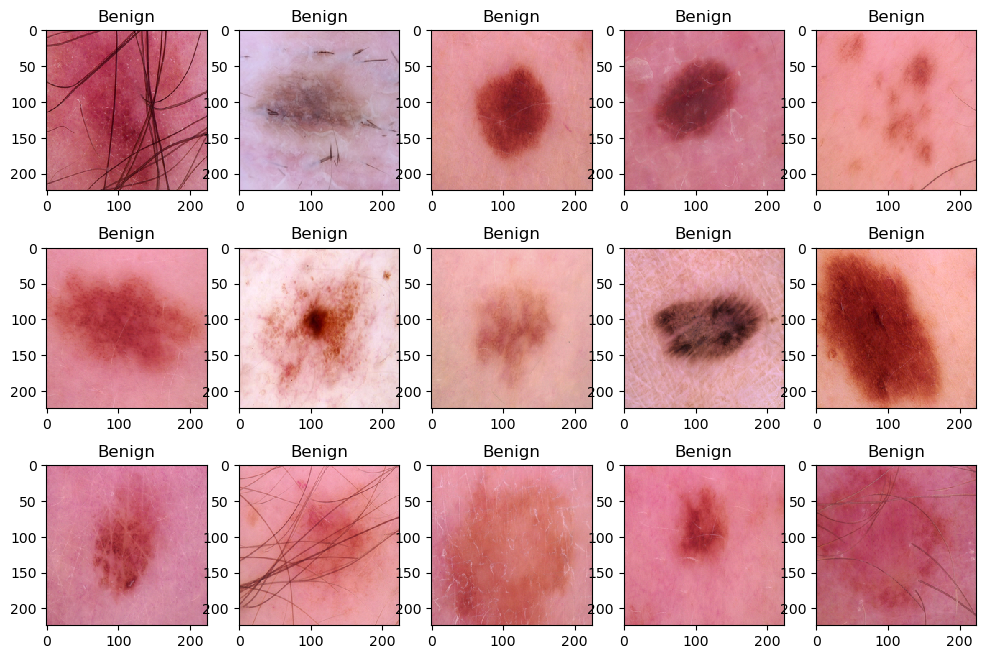

In [146]:
w=40
h=30
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if test_labels[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(test_images[i], interpolation='nearest')
plt.show()

In [147]:
def list_to_array_train(train_images,train_labels):
  return np.array(train_images),np.array(train_labels)

X_train,y_train=list_to_array_train(train_images,train_labels)


def list_to_array_test(test_images,test_labels):
  return np.array(test_images),np.array(test_labels)


X_test,y_test=list_to_array_test(test_images,test_labels)


In [148]:
print(X_train.shape)
print("*"*20)
print(y_train.shape)
print("*"*20)
print(X_test.shape)
print(y_test.shape)

(50, 224, 224, 3)
********************
(50,)
********************
(50, 224, 224, 3)
(50,)


In [149]:
def keras_to_categorical(y_train,y_test):
  return to_categorical(y_train),to_categorical(y_test)
y_train1=y_train
y_test1=y_test
y_train,y_test=keras_to_categorical(y_train,y_test)

In [150]:
y_train1.shape,y_test1.shape

((50,), (50,))

# 1.a.

In [151]:
def model_vgg16():
  VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model
  for layer in VGG_model.layers:
    layer.trainable = False

# Add custom dense layers for classification
  feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)
  d1=Dense(units=64,kernel_initializer="glorot_uniform", activation='relu')(feature)
  d2=Dense(units=32,kernel_initializer="glorot_uniform", activation='sigmoid')(d1)
  d3=Dense(units=2,kernel_initializer="glorot_uniform", activation='softmax')(d2)
  output = Model(inputs =VGG_model.input, outputs =d3)

  return output

model16=model_vgg16()

In [152]:
model16.compile(optimizer='Adam', loss='mse', metrics='accuracy')

In [153]:
history = model16.fit(X_train, y_train, validation_split=0.2,epochs= 10, batch_size= 5, verbose=1,validation_data=(X_test,y_test))


Epoch 1/10
10/10 [==============================] - 10s 952ms/step - loss: 0.2077 - accuracy: 0.6800 - val_loss: 0.1224 - val_accuracy: 0.8400
Epoch 2/10
10/10 [==============================] - 9s 985ms/step - loss: 0.1137 - accuracy: 0.9200 - val_loss: 0.0891 - val_accuracy: 0.9200
Epoch 3/10
10/10 [==============================] - 9s 970ms/step - loss: 0.0738 - accuracy: 0.9600 - val_loss: 0.0661 - val_accuracy: 0.9400
Epoch 4/10
10/10 [==============================] - 10s 1s/step - loss: 0.0699 - accuracy: 0.9000 - val_loss: 0.0534 - val_accuracy: 0.9400
Epoch 5/10
10/10 [==============================] - 10s 1s/step - loss: 0.0523 - accuracy: 0.9600 - val_loss: 0.0460 - val_accuracy: 0.9600
Epoch 6/10
10/10 [==============================] - 10s 1s/step - loss: 0.0381 - accuracy: 0.9600 - val_loss: 0.0314 - val_accuracy: 0.9600
Epoch 7/10
10/10 [==============================] - 10s 1s/step - loss: 0.0297 - accuracy: 0.9800 - val_loss: 0.0249 - val_accuracy: 0.9800
Epoch 8/10
10

# 1.b.

In [72]:
def model_vgg16():
  VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model
  for layer in VGG_model.layers:
    layer.trainable = False

# Add custom dense layers for classification
  feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)
  #d1=Dense(units=64,kernel_initializer="glorot_uniform", activation='relu')(feature)
  #d2=Dense(units=32,kernel_initializer="glorot_uniform", activation='sigmoid')(d1)
  #d3=Dense(units=2,kernel_initializer="glorot_uniform", activation='softmax')(d2)
  #output = Model(inputs =VGG_model.input, outputs =d3)
  output = Model(inputs =VGG_model.input, outputs =feature)

  return output

model_FE_16=model_vgg16()

In [73]:
model_FE_16.compile(optimizer='Adam', loss='mse', metrics='accuracy')
train_feature_16=model_FE_16.predict(X_train)
test_feature_16=model_FE_16.predict(X_test)

2/2 [==============================] - 4s 2s/step


In [74]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf=rf.fit(train_feature_16,y_train)
train_pred=rf.predict(train_feature_16)
test_pred=rf.predict(test_feature_16)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))

Train Accuracy Score 1.0
Test Accuracy Score 1.0


# 1.c.

In [76]:
def model_vgg19():
  VGG_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model
  for layer in VGG_model.layers:
    layer.trainable = False

# Add custom dense layers for classification
  feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)
  d1=Dense(units=64,kernel_initializer="glorot_uniform", activation='relu')(feature)
  d2=Dense(units=32,kernel_initializer="glorot_uniform", activation='sigmoid')(d1)
  d3=Dense(units=2,kernel_initializer="glorot_uniform", activation='softmax')(d2)
  output = Model(inputs =VGG_model.input, outputs =d3)

  return output

model19=model_vgg19()

In [77]:
model19.compile(optimizer='Adam', loss='mse', metrics='accuracy')

In [78]:
history = model16.fit(X_train, y_train, validation_split=0.2,epochs= 10, batch_size= 5, verbose=1,validation_data=(X_test,y_test))

Epoch 1/10
10/10 [==============================] - 10s 1s/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 0.0089 - val_accuracy: 1.0000
Epoch 2/10
10/10 [==============================] - 10s 1s/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 10s 1s/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 4/10
10/10 [==============================] - 10s 1s/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 11s 1s/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 11s 1s/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 11s 1s/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 8/10
10/10 [==

In [79]:
def model_vgg19():
  VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model
  for layer in VGG_model.layers:
    layer.trainable = False

# Add custom dense layers for classification
  feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)
  #d1=Dense(units=64,kernel_initializer="glorot_uniform", activation='relu')(feature)
  #d2=Dense(units=32,kernel_initializer="glorot_uniform", activation='sigmoid')(d1)
  #d3=Dense(units=2,kernel_initializer="glorot_uniform", activation='softmax')(d2)
  #output = Model(inputs =VGG_model.input, outputs =d3)
  output = Model(inputs =VGG_model.input, outputs =feature)

  return output

model_FE_19=model_vgg19()

In [80]:
model_FE_19.compile(optimizer='Adam', loss='mse', metrics='accuracy')
train_feature_19=model_FE_19.predict(X_train)
test_feature_19=model_FE_19.predict(X_test)

2/2 [==============================] - 5s 2s/step


In [81]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf=rf.fit(train_feature_19,y_train)
train_pred=rf.predict(train_feature_19)
test_pred=rf.predict(test_feature_19)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))

Train Accuracy Score 1.0
Test Accuracy Score 1.0


In [82]:
final_train=np.hstack((train_feature_16,train_feature_19))
final_test=np.hstack((test_feature_16,test_feature_19))

In [83]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf=rf.fit(final_train,y_train)
train_pred=rf.predict(final_train)
test_pred=rf.predict(final_test)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))

Train Accuracy Score 1.0
Test Accuracy Score 1.0


# 2.

In [84]:
#data path
trainpath = 'C:\\Users\\Admin\\Desktop\\Orange_Dataset\\train' #Please give the path where you are saving the train folder.
testpath = 'C:\\Users\\Admin\\Desktop\\Orange_Dataset\\train' #please give the path where you are saving the test folder.

In [85]:
new_size=224
train_images=[]
train_labels=[]
for i in os.listdir(trainpath):#entering train folder
  print("Entering to the folder name:",i)
  files=gb.glob(pathname=str(trainpath+'/' + i + '/*.jpg'))# pointing to all the .jpg extension image folder
  print("Number of images in the folder is",len(files))
  for j in files:# reading each images
      class_orange={'Anthracnose':0,'BlackSpot':1,'Healthy':2}
      image_raw=cv2.imread(j)
      image=cv2.cvtColor(image_raw,cv2.COLOR_BGR2RGB)
      resize_image=cv2.resize(image,(new_size,new_size))
      train_images.append(list(resize_image))
      train_labels.append(class_orange[i])
      

Entering to the folder name: Anthracnose
Number of images in the folder is 30
Entering to the folder name: BlackSpot
Number of images in the folder is 30
Entering to the folder name: Healthy
Number of images in the folder is 30


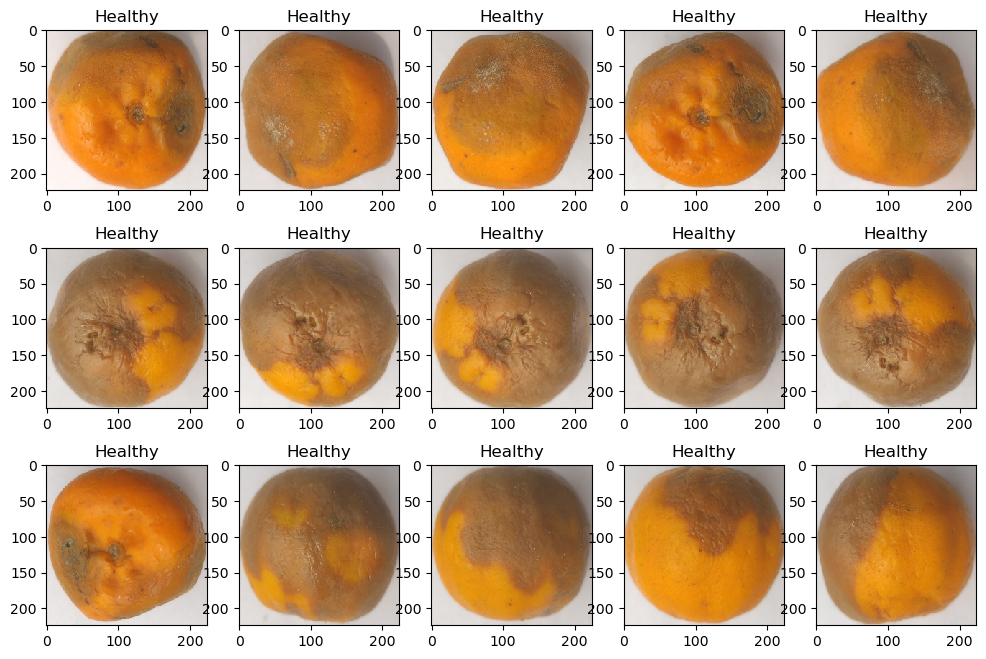

In [86]:
w=40
h=30
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if train_labels[i] == 0:
        ax.title.set_text('Anthracnose')
    if train_labels[i] == 1:
        ax.title.set_text('BlackSpot')
    else:
        ax.title.set_text('Healthy')
    plt.imshow(train_images[i], interpolation='nearest')
plt.show()

In [87]:
new_size=224
test_images=[]
test_labels=[]
for i in os.listdir(testpath):#entering train folder
  print("Entering to the folder name:",i)
  files=gb.glob(pathname=str(testpath+'/' + i + '/*.jpg'))# pointing to all the .jpg extension image folder
  print("Number of images in the folder is",len(files))
  for j in files:# reading each images
      class_orange={'Anthracnose':0,'BlackSpot':1,'Healthy':2}
      image_raw=cv2.imread(j)
      image=cv2.cvtColor(image_raw,cv2.COLOR_BGR2RGB)
      resize_image=cv2.resize(image,(new_size,new_size))
      test_images.append(list(resize_image))
      test_labels.append(class_orange[i])     

Entering to the folder name: Anthracnose
Number of images in the folder is 30
Entering to the folder name: BlackSpot
Number of images in the folder is 30
Entering to the folder name: Healthy
Number of images in the folder is 30


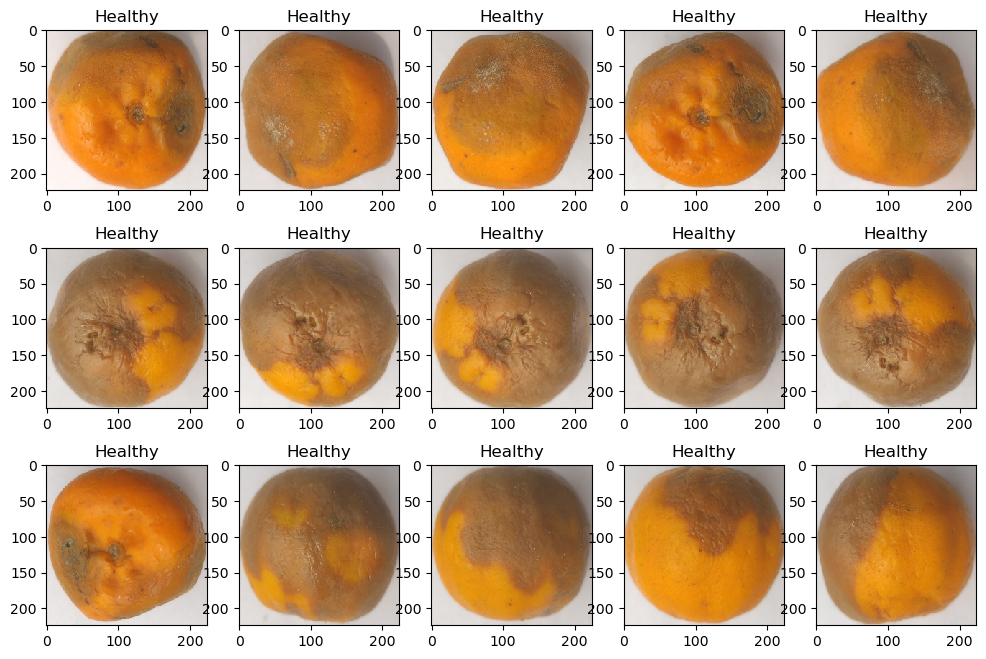

In [88]:
w=40
h=30
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if train_labels[i] == 0:
        ax.title.set_text('Anthracnose')
    if train_labels[i] == 1:
        ax.title.set_text('BlackSpot')
    else:
        ax.title.set_text('Healthy')
    plt.imshow(train_images[i], interpolation='nearest')
plt.show()

In [89]:
def list_to_array_train(train_images,train_labels):
  return np.array(train_images),np.array(train_labels)

X_train,y_train=list_to_array_train(train_images,train_labels)


def list_to_array_test(test_images,test_labels):
  return np.array(test_images),np.array(test_labels)


X_test,y_test=list_to_array_test(test_images,test_labels)


In [90]:
print(X_train.shape)
print("*"*20)
print(y_train.shape)
print("*"*20)
print(X_test.shape)
print(y_test.shape)

(90, 224, 224, 3)
********************
(90,)
********************
(90, 224, 224, 3)
(90,)


In [91]:
def keras_to_categorical(y_train,y_test):
  return to_categorical(y_train),to_categorical(y_test)
y_train2=y_train
y_test2=y_test
y_train,y_test=keras_to_categorical(y_train,y_test)

In [92]:
y_train2.shape,y_test2.shape

((90,), (90,))

# 2.a.

In [93]:
def model_vgg16():
  VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model
  for layer in VGG_model.layers:
    layer.trainable = False

# Add custom dense layers for classification
  feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)
  d1=Dense(units=64,kernel_initializer="glorot_uniform", activation='relu')(feature)
  d2=Dense(units=32,kernel_initializer="glorot_uniform", activation='sigmoid')(d1)
  d3=Dense(units=3,kernel_initializer="glorot_uniform", activation='softmax')(d2)
  output = Model(inputs =VGG_model.input, outputs =d3)

  return output

model16=model_vgg16()

In [94]:
model16.compile(optimizer='Adam', loss='mse', metrics='accuracy')

In [95]:
history = model16.fit(X_train, y_train, validation_split=0.2,epochs= 10, batch_size= 5, verbose=1,validation_data=(X_test,y_test))

Epoch 1/10
18/18 [==============================] - 18s 982ms/step - loss: 0.1055 - accuracy: 0.8667 - val_loss: 0.0405 - val_accuracy: 1.0000
Epoch 2/10
18/18 [==============================] - 18s 1s/step - loss: 0.0287 - accuracy: 1.0000 - val_loss: 0.0181 - val_accuracy: 1.0000
Epoch 3/10
18/18 [==============================] - 19s 1s/step - loss: 0.0143 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 4/10
18/18 [==============================] - 20s 1s/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.0080 - val_accuracy: 1.0000
Epoch 5/10
18/18 [==============================] - 20s 1s/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 6/10
18/18 [==============================] - 19s 1s/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 7/10
18/18 [==============================] - 20s 1s/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 8/10
18/18 

# 2.b.

In [96]:
def model_vgg16():
  VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model
  for layer in VGG_model.layers:
    layer.trainable = False

# Add custom dense layers for classification
  feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)
  #d1=Dense(units=64,kernel_initializer="glorot_uniform", activation='relu')(feature)
  #d2=Dense(units=32,kernel_initializer="glorot_uniform", activation='sigmoid')(d1)
  #d3=Dense(units=3,kernel_initializer="glorot_uniform", activation='softmax')(d2)
  #output = Model(inputs =VGG_model.input, outputs =d3)
  output = Model(inputs =VGG_model.input, outputs =feature)

  return output

model_FE_16=model_vgg16()

In [97]:
model_FE_16.compile(optimizer='Adam', loss='mse', metrics='accuracy')
train_feature_16=model_FE_16.predict(X_train)
test_feature_16=model_FE_16.predict(X_test)

3/3 [==============================] - 9s 3s/step


In [98]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf=rf.fit(train_feature_16,y_train)
train_pred=rf.predict(train_feature_16)
test_pred=rf.predict(test_feature_16)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))

Train Accuracy Score 1.0
Test Accuracy Score 1.0


# 2.c.

In [102]:
def model_vgg19():
  VGG_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model
  for layer in VGG_model.layers:
    layer.trainable = False

# Add custom dense layers for classification
  feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)
  d1=Dense(units=64,kernel_initializer="glorot_uniform", activation='relu')(feature)
  d2=Dense(units=32,kernel_initializer="glorot_uniform", activation='sigmoid')(d1)
  d3=Dense(units=3,kernel_initializer="glorot_uniform", activation='softmax')(d2)
  output = Model(inputs =VGG_model.input, outputs =d3)

  return output

model19=model_vgg19()

In [103]:
model19.compile(optimizer='Adam', loss='mse', metrics='accuracy')

In [104]:
history = model16.fit(X_train, y_train, validation_split=0.2,epochs= 10, batch_size= 5, verbose=1,validation_data=(X_test,y_test))

Epoch 1/10
18/18 [==============================] - 18s 1s/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 2/10
18/18 [==============================] - 19s 1s/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 3/10
18/18 [==============================] - 20s 1s/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 4/10
18/18 [==============================] - 20s 1s/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 5/10
18/18 [==============================] - 20s 1s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 6/10
18/18 [==============================] - 20s 1s/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 7/10
18/18 [==============================] - 20s 1s/step - loss: 9.7374e-04 - accuracy: 1.0000 - val_loss: 9.2636e-04 - val_accuracy: 1.0000
Epoch 8/10
1

In [105]:
def model_vgg19():
  VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model
  for layer in VGG_model.layers:
    layer.trainable = False

# Add custom dense layers for classification
  feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)
  #d1=Dense(units=64,kernel_initializer="glorot_uniform", activation='relu')(feature)
  #d2=Dense(units=32,kernel_initializer="glorot_uniform", activation='sigmoid')(d1)
  #d3=Dense(units=3,kernel_initializer="glorot_uniform", activation='softmax')(d2)
  #output = Model(inputs =VGG_model.input, outputs =d3)
  output = Model(inputs =VGG_model.input, outputs =feature)

  return output

model_FE_19=model_vgg19()

In [106]:
model_FE_19.compile(optimizer='Adam', loss='mse', metrics='accuracy')
train_feature_19=model_FE_19.predict(X_train)
test_feature_19=model_FE_19.predict(X_test)

3/3 [==============================] - 9s 3s/step


In [107]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf=rf.fit(train_feature_19,y_train)
train_pred=rf.predict(train_feature_19)
test_pred=rf.predict(test_feature_19)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))

Train Accuracy Score 1.0
Test Accuracy Score 1.0


In [108]:
final_train=np.hstack((train_feature_16,train_feature_19))
final_test=np.hstack((test_feature_16,test_feature_19))

In [109]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf=rf.fit(final_train,y_train)
train_pred=rf.predict(final_train)
test_pred=rf.predict(final_test)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))

Train Accuracy Score 1.0
Test Accuracy Score 1.0
